In [1]:
import pandas as pd
df = pd.read_csv('model.csv', index_col = [0])
pd.set_option("display.max.columns", None)
df.head()

,status,num_funding_rounds,age,yrs_since_last_funding,last_funding_lag,tf_usd_log,emp_LSE,emp_MSE,emp_SSE,social_Medium,social_None,social_Strong,social_Weak,sector_Communications Services,sector_Consumer Directory,sector_Consumer Staples,sector_Financial Services,sector_Health Care,sector_Industrials,sector_Technology,region_Asia,region_Europe,region_North America,region_South America
386,1,1.0,0,16,-16,18.683045,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
454,1,3.0,9,0,9,20.054811,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
505,1,1.0,2,15,-13,9.615805,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
800,1,8.0,10,5,5,15.908608,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
832,0,1.0,4,3,1,15.201805,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [2]:
df.shape

(99434, 24)

### Generating Train-Test Split

In [3]:
X = df.drop(['status'], axis = 1)
y = df['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=26)

### Defining Imbalance Solutions

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

#### Undersampling:

In [5]:
from collections import Counter 
from sklearn.datasets import make_classification
# Undersampling only on train
rus = RandomUnderSampler(random_state=26)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#### Oversampling:

In [6]:
# Oversampling only on train

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=26)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#### SMOTE:

In [7]:
# SMOTE only on train
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(random_state=26)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### ADASYN:

In [8]:
# ADASYN only on train
adasyn = ADASYN(random_state=26)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Building The Models with the Various Datasetes

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn import metrics

In [10]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

# Logistic Regression

Model Name : LR imbalance
Train Accuracy :0.89207
Test Accuracy :0.89444
Train AUC : 0.53272
Test AUC : 0.53435
Train Precision : 0.90111
Test Precision : 0.90353
Train Recall : 0.98779
Test Recall : 0.98780
Train F1 : 0.94246
Test F1 : 0.94379
Confusion Matrix : 
 [[  207  2352]
 [  272 22028]]


Model Name : LR Undersampling
Train Accuracy :0.75711
Test Accuracy :0.74967
Train AUC : 0.75711
Test AUC : 0.75323
Train Precision : 0.75889
Test Precision : 0.96420
Train Recall : 0.75367
Test Recall : 0.74874
Train F1 : 0.75627
Test F1 : 0.84292
Confusion Matrix : 
 [[ 1939   620]
 [ 5603 16697]]


Model Name : LR Oversampling
Train Accuracy :0.75444
Test Accuracy :0.75160
Train AUC : 0.75444
Test AUC : 0.75206
Train Precision : 0.75575
Test Precision : 0.96360
Train Recall : 0.75187
Test Recall : 0.75148
Train F1 : 0.75380
Test F1 : 0.84442
Confusion Matrix : 
 [[ 1926   633]
 [ 5542 16758]]


Model Name : LR SMOTE
Train Accuracy :0.84501
Test Accuracy :0.82204
Train AUC : 0.84501
Test AU

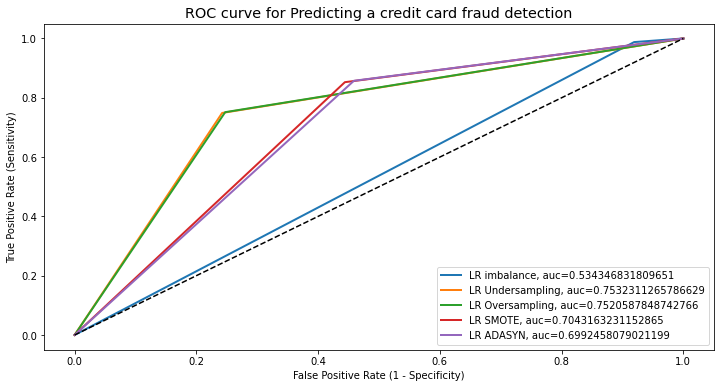

In [11]:
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr')
                 , X_train,y_train,X_test,y_test))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr')
                 ,X_train_rus,y_train_rus,X_test,y_test))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr')
                 ,X_train_ros,y_train_ros,X_test,y_test))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr')
                 ,X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr')
                 ,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 386 to 2160247
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   status                          99434 non-null  int64  
 1   num_funding_rounds              99434 non-null  float64
 2   age                             99434 non-null  int64  
 3   yrs_since_last_funding          99434 non-null  int64  
 4   last_funding_lag                99434 non-null  int64  
 5   tf_usd_log                      99434 non-null  float64
 6   emp_LSE                         99434 non-null  int64  
 7   emp_MSE                         99434 non-null  int64  
 8   emp_SSE                         99434 non-null  int64  
 9   social_Medium                   99434 non-null  int64  
 10  social_None                     99434 non-null  int64  
 11  social_Strong                   99434 non-null  int64  
 12  social_Weak                 

# Decision Tree

Model Name : DT imbalance
Train Accuracy :0.99355
Test Accuracy :0.84143
Train AUC : 0.99195
Test AUC : 0.59751
Train Precision : 0.99881
Test Precision : 0.91742
Train Recall : 0.99398
Test Recall : 0.90466
Train F1 : 0.99639
Test F1 : 0.91100
Confusion Matrix : 
 [[  743  1816]
 [ 2126 20174]]


Model Name : DT Undersampling
Train Accuracy :0.99573
Test Accuracy :0.67460
Train AUC : 0.99573
Test AUC : 0.67369
Train Precision : 0.99987
Test Precision : 0.94725
Train Recall : 0.99158
Test Recall : 0.67484
Train F1 : 0.99571
Test F1 : 0.78817
Confusion Matrix : 
 [[ 1721   838]
 [ 7251 15049]]


Model Name : DT Oversampling
Train Accuracy :0.99577
Test Accuracy :0.84054
Train AUC : 0.99577
Test AUC : 0.58352
Train Precision : 1.00000
Test Precision : 0.91439
Train Recall : 0.99153
Test Recall : 0.90717
Train F1 : 0.99575
Test F1 : 0.91077
Confusion Matrix : 
 [[  665  1894]
 [ 2070 20230]]


Model Name : DT SMOTE
Train Accuracy :0.99613
Test Accuracy :0.81568
Train AUC : 0.99613
Test AU

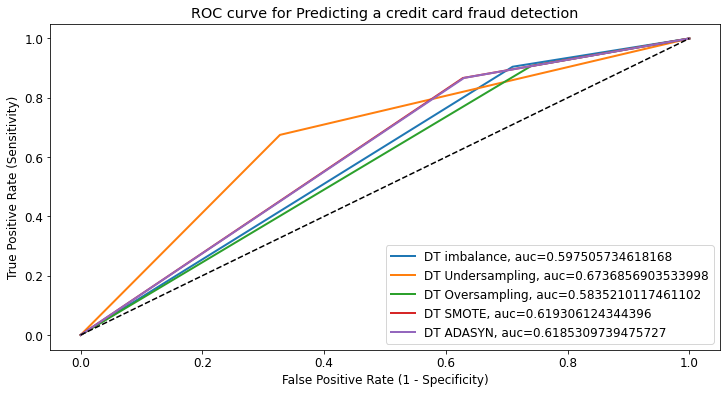

In [13]:
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

# Random Forest

Model Name : RF imbalance
Train Accuracy :0.99352
Test Accuracy :0.87590
Train AUC : 0.97821
Test AUC : 0.57919
Train Precision : 0.99517
Test Precision : 0.91268
Train Recall : 0.99760
Test Recall : 0.95283
Train F1 : 0.99639
Test F1 : 0.93232
Confusion Matrix : 
 [[  526  2033]
 [ 1052 21248]]


Model Name : RF Undersampling
Train Accuracy :0.99560
Test Accuracy :0.71326
Train AUC : 0.99560
Test AUC : 0.73588
Train Precision : 0.99808
Test Precision : 0.96318
Train Recall : 0.99311
Test Recall : 0.70740
Train F1 : 0.99559
Test F1 : 0.81571
Confusion Matrix : 
 [[ 1956   603]
 [ 6525 15775]]


Model Name : RF Oversampling
Train Accuracy :0.99576
Test Accuracy :0.85840
Train AUC : 0.99576
Test AUC : 0.60437
Train Precision : 0.99998
Test Precision : 0.91841
Train Recall : 0.99153
Test Recall : 0.92426
Train F1 : 0.99574
Test F1 : 0.92133
Confusion Matrix : 
 [[  728  1831]
 [ 1689 20611]]


Model Name : RF SMOTE
Train Accuracy :0.99609
Test Accuracy :0.84738
Train AUC : 0.99609
Test AU

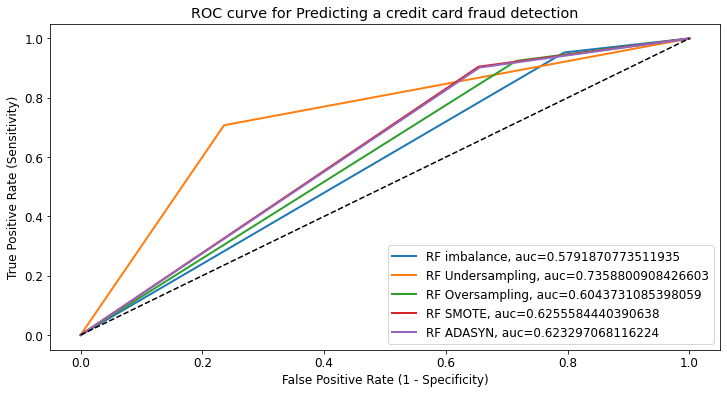

In [14]:
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

# Extreme Gradient Boosting

/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Name : XG imbalance
Train Accuracy :0.90204
Test Accuracy :0.89658
Train AUC : 0.55061
Test AUC : 0.52706
Train Precision : 0.90450
Test Precision : 0.90212
Train Recall : 0.99565
Test Recall : 0.99238
Train F1 : 0.94789
Test F1 : 0.94510
Confusion Matrix : 
 [[  158  2401]
 [  170 22130]]


[16:38:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Model Name : XG Undersampling
Train Accuracy :0.84362
Test Accuracy :0.71865
Train AUC : 0.84362
Test AUC : 0.75324
Train Precision : 0.88227
Test Precision : 0.96819
Train Recall : 0.79306
Test Recall : 0.70969
Train F1 : 0.83529
Test F1 : 0.81902
Confusion Matrix : 
 [[ 2039   520]
 [ 6474 15826]]


[16:38:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Model Name : XG Oversampling
Train Accuracy :0.82864
Test Accuracy :0.75144
Train AUC : 0.82864
Test AUC : 0.75750
Train Precision : 0.88068
Test Precision : 0.96531
Train Recall : 0.76028
Test Recall : 0.74987
Train F1 : 0.81606
Test F1 : 0.84406
Confusion Matrix : 
 [[ 1958   601]
 [ 5578 16722]]


[16:38:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Model Name : XG SMOTE
Train Accuracy :0.89731
Test Accuracy :0.83563
Train AUC : 0.89731
Test AUC : 0.68993
Train Precision : 0.90947
Test Precision : 0.93910
Train Recall : 0.88246
Test Recall : 0.87341
Train F1 : 0.89576
Test F1 : 0.90507
Confusion Matrix : 
 [[ 1296  1263]
 [ 2823 19477]]




/Users/hallam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Name : XG ADASYN
Train Accuracy :0.89502
Test Accuracy :0.83632
Train AUC : 0.89511
Test AUC : 0.68166
Train Precision : 0.90547
Test Precision : 0.93705
Train Recall : 0.88403
Test Recall : 0.87641
Train F1 : 0.89462
Test F1 : 0.90572
Confusion Matrix : 
 [[ 1246  1313]
 [ 2756 19544]]




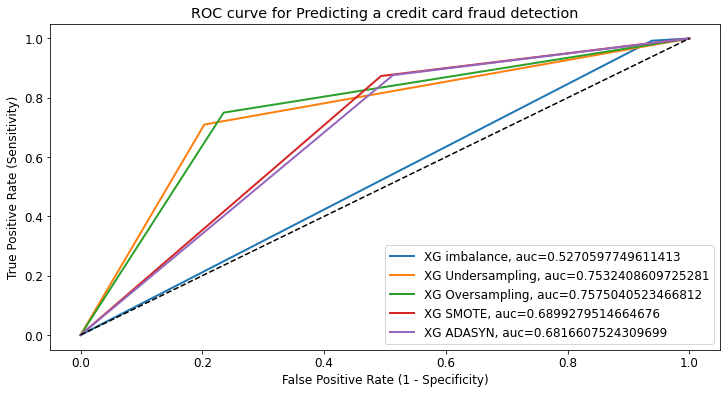

In [15]:
XGmodels = []

xg = XGBClassifier()

XGmodels.append(('XG imbalance', xg,X_train,y_train,X_test,y_test))
XGmodels.append(('XG Undersampling', xg,X_train_rus,y_train_rus,X_test,y_test))
XGmodels.append(('XG Oversampling', xg,X_train_ros,y_train_ros,X_test,y_test))
XGmodels.append(('XG SMOTE', xg,X_train_smote,y_train_smote,X_test,y_test))
XGmodels.append(('XG ADASYN', xg,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(XGmodels)

### Feature Importance 

#### DECISIN TREE FI

Feature: 0, Score: 0.05171
Feature: 1, Score: 0.04199
Feature: 2, Score: 0.33832
Feature: 3, Score: 0.03837
Feature: 4, Score: 0.31284
Feature: 5, Score: 0.00347
Feature: 6, Score: 0.00693
Feature: 7, Score: 0.00796
Feature: 8, Score: 0.01309
Feature: 9, Score: 0.01407
Feature: 10, Score: 0.01815
Feature: 11, Score: 0.01634
Feature: 12, Score: 0.01267
Feature: 13, Score: 0.01645
Feature: 14, Score: 0.01536
Feature: 15, Score: 0.01157
Feature: 16, Score: 0.00948
Feature: 17, Score: 0.01581
Feature: 18, Score: 0.01970
Feature: 19, Score: 0.01285
Feature: 20, Score: 0.00753
Feature: 21, Score: 0.01187
Feature: 22, Score: 0.00347


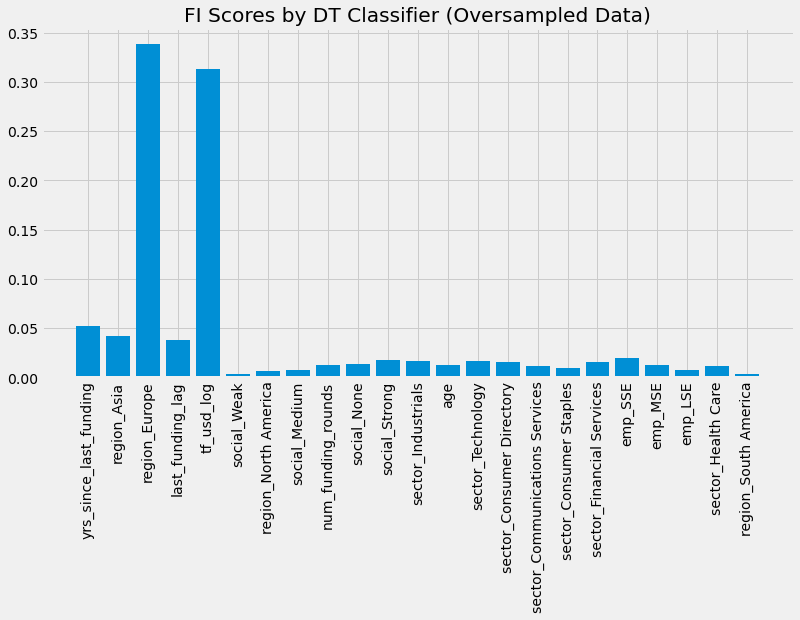

In [44]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train_ros, y_train_ros)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("FI Scores by DT Classifier (Oversampled Data)")
feat_names = df.drop(['status'],axis=1).columns
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
pyplot.show()

#### Random Forest 

In [20]:
iv = ['num_funding_rounds','age','yrs_since_last_funding','last_funding_lag', 'tf_usd_log',
      'emp_LSE', 'emp_MSE', 'emp_SSE', 'social_Medium', 'social_None', 'social_Strong', 'social_Weak',
      'sector_Communications Services', 'sector_Consumer Directory', 'sector_Consumer Staples', 
      'sector_Financial Services','sector_Health Care', 'sector_Industrials', 'sector_Technology', 'region_Asia',
      'region_Europe', 'region_North America', 'region_South America']

Feature: 0, Score: 0.06727
Feature: 1, Score: 0.10777
Feature: 2, Score: 0.21079
Feature: 3, Score: 0.09010
Feature: 4, Score: 0.34584
Feature: 5, Score: 0.00330
Feature: 6, Score: 0.00643
Feature: 7, Score: 0.00810
Feature: 8, Score: 0.00953
Feature: 9, Score: 0.01007
Feature: 10, Score: 0.01212
Feature: 11, Score: 0.01093
Feature: 12, Score: 0.00801
Feature: 13, Score: 0.01166
Feature: 14, Score: 0.01204
Feature: 15, Score: 0.00929
Feature: 16, Score: 0.00752
Feature: 17, Score: 0.01175
Feature: 18, Score: 0.01449
Feature: 19, Score: 0.01270
Feature: 20, Score: 0.01018
Feature: 21, Score: 0.01612
Feature: 22, Score: 0.00399


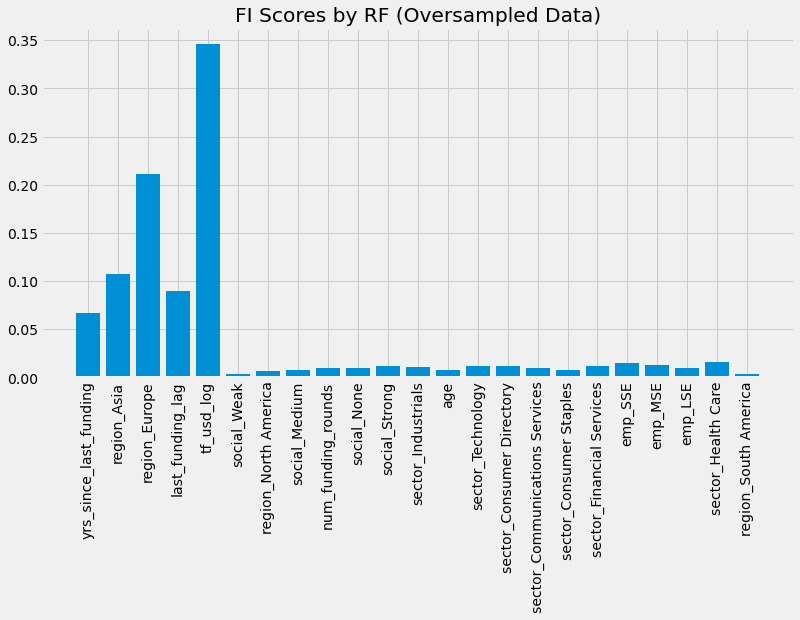

In [40]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train_ros, y_train_ros)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("FI Scores by RF (Oversampled Data)")
feat_names = df.drop(['status'],axis=1).columns
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
pyplot.show()

Feature: 0, Score: 0.08400
Feature: 1, Score: 0.09616
Feature: 2, Score: 0.20906
Feature: 3, Score: 0.08988
Feature: 4, Score: 0.26136
Feature: 5, Score: 0.00578
Feature: 6, Score: 0.01322
Feature: 7, Score: 0.00984
Feature: 8, Score: 0.01619
Feature: 9, Score: 0.01505
Feature: 10, Score: 0.01932
Feature: 11, Score: 0.01852
Feature: 12, Score: 0.01020
Feature: 13, Score: 0.01620
Feature: 14, Score: 0.01594
Feature: 15, Score: 0.01128
Feature: 16, Score: 0.01114
Feature: 17, Score: 0.01641
Feature: 18, Score: 0.02003
Feature: 19, Score: 0.02329
Feature: 20, Score: 0.01797
Feature: 21, Score: 0.01419
Feature: 22, Score: 0.00495


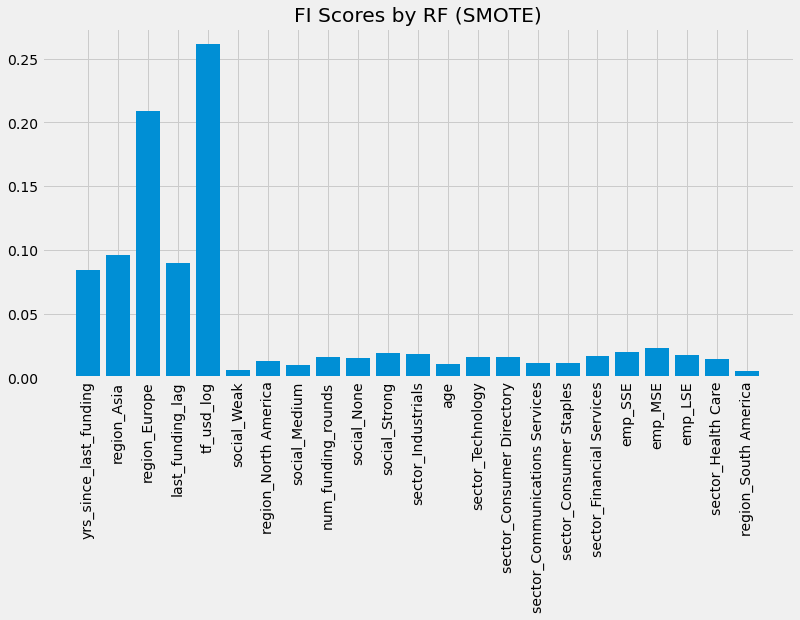

In [42]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train_smote, y_train_smote)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("FI Scores by RF (SMOTE)")
feat_names = df.drop(['status'],axis=1).columns
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
pyplot.show()

Feature: 0, Score: 0.09027
Feature: 1, Score: 0.09315
Feature: 2, Score: 0.18904
Feature: 3, Score: 0.08939
Feature: 4, Score: 0.26582
Feature: 5, Score: 0.00638
Feature: 6, Score: 0.01297
Feature: 7, Score: 0.01005
Feature: 8, Score: 0.01783
Feature: 9, Score: 0.01557
Feature: 10, Score: 0.02039
Feature: 11, Score: 0.01940
Feature: 12, Score: 0.01054
Feature: 13, Score: 0.01700
Feature: 14, Score: 0.01674
Feature: 15, Score: 0.01246
Feature: 16, Score: 0.01234
Feature: 17, Score: 0.01817
Feature: 18, Score: 0.02183
Feature: 19, Score: 0.02172
Feature: 20, Score: 0.01876
Feature: 21, Score: 0.01505
Feature: 22, Score: 0.00514


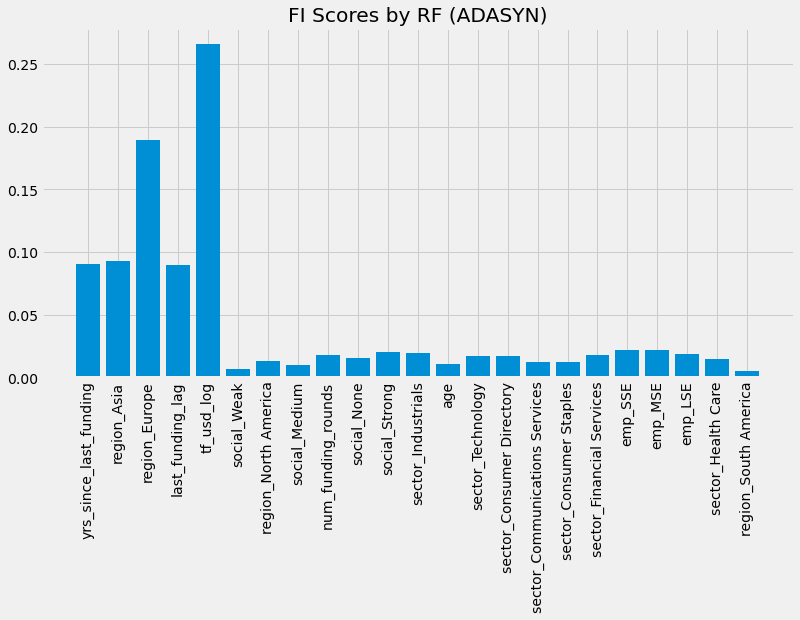

In [43]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train_adasyn, y_train_adasyn)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("FI Scores by RF (ADASYN)")
feat_names = df.drop(['status'],axis=1).columns
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
pyplot.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 386 to 2160247
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   status                          99434 non-null  int64  
 1   num_funding_rounds              99434 non-null  float64
 2   age                             99434 non-null  int64  
 3   yrs_since_last_funding          99434 non-null  int64  
 4   last_funding_lag                99434 non-null  int64  
 5   tf_usd_log                      99434 non-null  float64
 6   emp_LSE                         99434 non-null  int64  
 7   emp_MSE                         99434 non-null  int64  
 8   emp_SSE                         99434 non-null  int64  
 9   social_Medium                   99434 non-null  int64  
 10  social_None                     99434 non-null  int64  
 11  social_Strong                   99434 non-null  int64  
 12  social_Weak                 